In [351]:
%load_ext autoreload
%autoreload 2

from Graph_creator import Graph_creator

import json
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [352]:
name = ['1_1234_back1', '1_1234_back2', '1_1234_back3', '1_1234_back4', '1_1234_back5', 
        '2_1256_back1', '2_1256_back2', '2_1256_back3', '2_1256_back4', '2_1256_back5',
        '3_78910_back1', '3_78910_back2', '3_78910_back3', '3_78910_back4', '4_9101112_back1',
        '4_9101112_back2', '4_9101112_back3', '4_9101112_back4', '4_9101112_back5', '4_9101112_back6',
        '5_781314_back1', '5_781314_back2', '5_781314_back3', '5_781314_back5', '6_171834_back1',
        '6_171834_back2', '6_171834_back3', '6_171834_back4', '6_171834_back5', '7_1_2_9_10_back2']
start = [2.49, 1.53, 4.08, 8.42, 4.37, 2.65, 3.71, 3.12, 0.76, 1.96, 1.48, 2.17, 1.16, 
         1.65, 5.59, 1.55, 0.14, 0.00, 1.71, 1.96, 0.05, 4.25, 1.02, 0.58, 0.82, 0.15, 1.58, 2.65, 3.11, 1.53]
end = [6.96, 18.03, 20.24, 14.03, 12.31, 12.34, 15.60, 12.24, 9.01, 23.38, 27.04, 10.92, 27.83, 
       2.90, 10.32, 8.82, 4.18, 8.88, 5.01, 21.74, 11.42, 8.01, 7.80, 5.70, 10.13, 8.95, 10.96, 8.80, 9.34, 5.75]
players = [[3,7,0,5],[0,1,3,6], [1,17,20,19], [0,2,1,3], [0,1,4,2], [7,8,4,0], [0,2,3,1], [0,1,2,6], [0,8,1,2], [0,3,1,2], [8,2,0,1], 
           [0,7,1,6], [0,1,4,11], [0,1,3,4], [0,1,5,10], [0,1,2,11], [0,1,4,5], [0,11,8,4], [0,1,2,7], [0,11,9,5], [0,2,1,6], [0,1,2,7],
           [0,1,9,2], [0,1,3,4], [0,1,8,5], [1,0,2,5], [0,1,2,5],[0,8,1,3], [0,2,1,5], [0,3,1,6]]
end_v = [8, 19, 22, 15, 13, 14, 17, 12, 10, 24, 28, 12, 29, 5, 11, 10, 6, 10, 7, 24, 13, 10, 9, 6, 11, 10, 12, 10, 10, 7]

In [364]:
d = {'video': name, 'start':start, 'end':end, 'players':players, 'video_stop':end_v}
df = pd.DataFrame(data=d)
df.drop(15, inplace=True)
df = df.sample(frac=1)
df

,video,start,end,players,video_stop
0,1_1234_back1,2.49,6.96,"[3, 7, 0, 5]",8
1,1_1234_back2,1.53,18.03,"[0, 1, 3, 6]",19
2,1_1234_back3,4.08,20.24,"[1, 17, 20, 19]",22
3,1_1234_back4,8.42,14.03,"[0, 2, 1, 3]",15
4,1_1234_back5,4.37,12.31,"[0, 1, 4, 2]",13
5,2_1256_back1,2.65,12.34,"[7, 8, 4, 0]",14
6,2_1256_back2,3.71,15.60,"[0, 2, 3, 1]",17
7,2_1256_back3,3.12,12.24,"[0, 1, 2, 6]",12
8,2_1256_back4,0.76,9.01,"[0, 8, 1, 2]",10
9,2_1256_back5,1.96,23.38,"[0, 3, 1, 2]",24


In [354]:
df.to_csv('data.csv',index=False)

In [355]:
datas = []
for index, row in df.iterrows():
    path = '/Users/mariakrylova/Documents/asd/' + row['video'] + '-detect.json'
    f1 = open(path)
    j1 = json.load(f1)
    g1 = Graph_creator(None, row['players'], j1, 0, row['video_stop'])
    g1.motion_relative_to_the_frame(save=False, close=True)
    datas.append(g1.creating_data(row['start'], row['end'], row['video'], 'draw'))


/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.close()
/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.close()
/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.close()
/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.close()
/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.close()
/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.close()
/Users/mariakrylova/Documents/model/graph/Graph_creator.py:361: UserWarning: Fixed

In [356]:
data = pd.concat(datas, ignore_index=True)
data

,track,frames,second,left_x,left_y,right_x,right_y,draw
0,7_1_2_9_10_back2_track_0,0,0,-1.173543,-0.978265,1.198401,-1.080769,0
1,7_1_2_9_10_back2_track_0,1,0,-1.173718,-0.978345,1.198432,-1.080836,0
2,7_1_2_9_10_back2_track_0,2,0,-1.157852,-0.971772,1.212083,-1.080867,0
3,7_1_2_9_10_back2_track_0,3,0,-1.172914,-0.971658,1.199090,-1.074577,0
4,7_1_2_9_10_back2_track_0,4,0,-1.173402,-0.978236,1.211824,-1.081002,0
...,...,...,...,...,...,...,...,...
44267,6_171834_back1_track_5,339,11,0.163240,-1.395213,-0.425735,-1.335000,0
44268,6_171834_back1_track_5,340,11,0.142895,-1.414455,-0.424953,-1.352235,0
44269,6_171834_back1_track_5,341,11,0.529217,-1.375982,-0.541664,-1.334431,0
44270,6_171834_back1_track_5,342,11,1.423309,-1.353609,-0.629641,-1.311030,0


Визуализация нормализованных данных с заполненными пропусками:

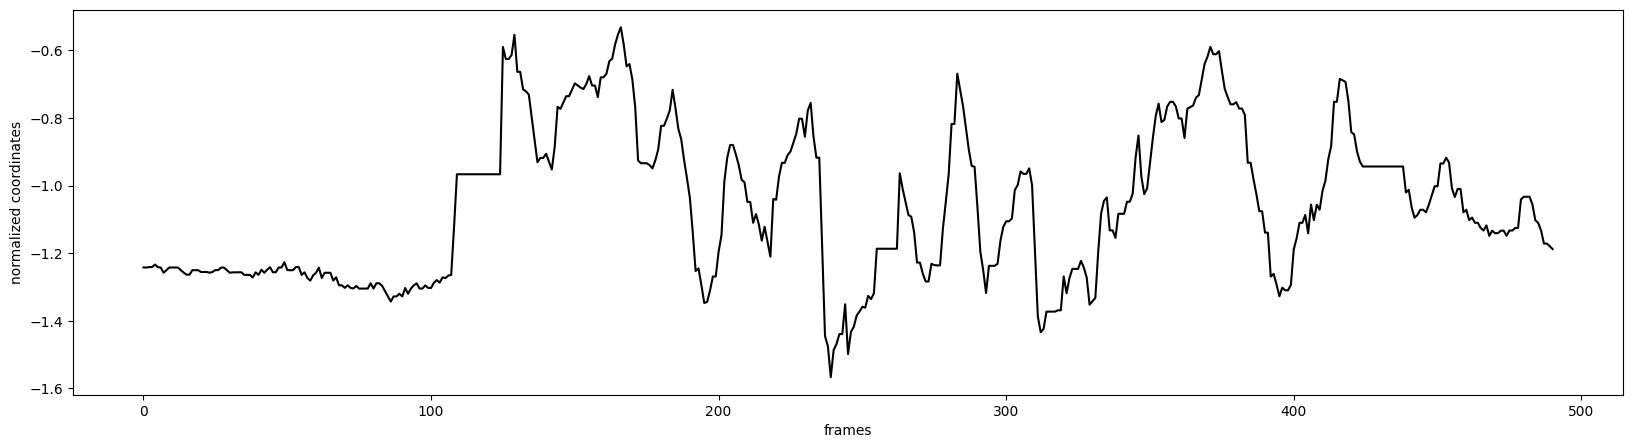

In [384]:
x = data[data['track'] == '2_1256_back2_track_2']['right_y'].tolist()
fig, axes = plt.subplots(figsize=(20, 5))
plt.plot(np.arange(len(x)), x, color='k')
plt.xlabel("frames", fontsize=10)
plt.ylabel("normalized coordinates", fontsize=10)
plt.savefig('for otchet right_y', bbox_inches='tight')

In [357]:
data.to_csv('data_badminton.csv',index=False)